<a href="https://colab.research.google.com/github/Tyrone-Evans/Analyising_Covid19/blob/main/datamaster_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Module 4.1


---
Tutor: Mr. Costley


---
Topic: Big Data Analytics




Sub Topic: Understandimg the fundamentals of big data and the need for big data technologies.

Setting up Pyspark in Google Colab

In [ ]:
!apt-get install openjdk-8-jdk-headless -qq > /dev/null
!wget -q https://archive.apache.org/dist/spark/spark-3.4.1/spark-3.4.1-bin-hadoop3.tgz
!tar -xvzf spark-3.4.1-bin-hadoop3.tgz
!pip install -q findspark

# set enviroment varibles
import os
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"
os.environ["SPARK_HOME"] = "/content/spark-3.4.1-bin-hadoop3"

#Initialize spark
import findspark
findspark.init()

from pyspark.sql import SparkSession
spark = SparkSession.builder.appName("Master Class").getOrCreate()

spark

spark-3.4.1-bin-hadoop3/
spark-3.4.1-bin-hadoop3/R/
spark-3.4.1-bin-hadoop3/R/lib/
spark-3.4.1-bin-hadoop3/R/lib/sparkr.zip
spark-3.4.1-bin-hadoop3/R/lib/SparkR/
spark-3.4.1-bin-hadoop3/R/lib/SparkR/html/
spark-3.4.1-bin-hadoop3/R/lib/SparkR/html/R.css
spark-3.4.1-bin-hadoop3/R/lib/SparkR/html/00Index.html
spark-3.4.1-bin-hadoop3/R/lib/SparkR/INDEX
spark-3.4.1-bin-hadoop3/R/lib/SparkR/help/
spark-3.4.1-bin-hadoop3/R/lib/SparkR/help/aliases.rds
spark-3.4.1-bin-hadoop3/R/lib/SparkR/help/AnIndex
spark-3.4.1-bin-hadoop3/R/lib/SparkR/help/SparkR.rdx
spark-3.4.1-bin-hadoop3/R/lib/SparkR/help/SparkR.rdb
spark-3.4.1-bin-hadoop3/R/lib/SparkR/help/paths.rds
spark-3.4.1-bin-hadoop3/R/lib/SparkR/worker/
spark-3.4.1-bin-hadoop3/R/lib/SparkR/worker/worker.R
spark-3.4.1-bin-hadoop3/R/lib/SparkR/worker/daemon.R
spark-3.4.1-bin-hadoop3/R/lib/SparkR/tests/
spark-3.4.1-bin-hadoop3/R/lib/SparkR/tests/testthat/
spark-3.4.1-bin-hadoop3/R/lib/SparkR/tests/testthat/test_basic.R
spark-3.4.1-bin-hadoop3/R/lib/S

In [ ]:
from pyspark.sql import Row
data=[Row(name='Alice', age=34),Row(name='Bob', age=45)]

In [ ]:
df = spark.createDataFrame(data)
df.show()

+-----+---+
| name|age|
+-----+---+
|Alice| 34|
|  Bob| 45|
+-----+---+



**Basic data** **exploration**

In [ ]:
df.printSchema()

root
 |-- name: string (nullable = true)
 |-- age: long (nullable = true)



In [ ]:
df.select('name').show()


+-----+
| name|
+-----+
|Alice|
|  Bob|
+-----+



In [ ]:
df.filter(df.age > 34).show()

+----+---+
|name|age|
+----+---+
| Bob| 45|
+----+---+



In [ ]:
df.withColumn('age', df.age + 1).show()

+-----+---+
| name|age|
+-----+---+
|Alice| 35|
|  Bob| 46|
+-----+---+



Assignment


---
assignment for model 4.1
1. using the sample dataframe above  add a column for 'senior' where age>40
2.filter and display only those with age>40 and name starting with 'B'
3. Count the number of rows


**Module 5.1**

**Tutor**: Mr. Costley

Topic: Intro Into Data Mining with Mall Customers Dataset



---
Sub topics

*   Concepts and purpose of Data Mining

*   Association Rule Mining usuing Apriopri on real Data

*   Performing Clustering using Kmeans

*   Conducting Customer Segmentation for Marketing Insights





In [ ]:
import pandas as pd


df

In [ ]:
df=pd.read_csv("/content/Data/Mall_Customers.csv")

In [ ]:
df.shape

(200, 5)

In [ ]:
print(df.head())

   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40


In [ ]:
df.info

<bound method DataFrame.info of      CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0             1    Male   19                  15                      39
1             2    Male   21                  15                      81
2             3  Female   20                  16                       6
3             4  Female   23                  16                      77
4             5  Female   31                  17                      40
..          ...     ...  ...                 ...                     ...
195         196  Female   35                 120                      79
196         197  Female   45                 126                      28
197         198    Male   32                 126                      74
198         199    Male   32                 137                      18
199         200    Male   30                 137                      83

[200 rows x 5 columns]>

In [ ]:
#check the genger that appear the most
df['Gender'].value_counts()

,count
Gender,
Female,112
Male,88


In [ ]:
unique_customers

200

In [ ]:
df['CustomerID'].nunique()

200

In [ ]:
gender_apperance=df['Gender'].value_counts()

**Data Mining Association Rule**



---


**Explore**

In [ ]:
!pip install mlxtend

In [ ]:
from mlxtend.frequent_patterns import apriori, association_rules

In [ ]:
from mlxtend.preprocessing import TransactionEncoder

In [ ]:
df['income_category']=pd.cut(df['Annual Income (k$)'],bins=[0,40,70,150],labels=['low','medium','high'])

In [ ]:
df

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),income_category
0,1,Male,19,15,39,low
1,2,Male,21,15,81,low
2,3,Female,20,16,6,low
3,4,Female,23,16,77,low
4,5,Female,31,17,40,low
...,...,...,...,...,...,...
195,196,Female,35,120,79,high
196,197,Female,45,126,28,high
197,198,Male,32,126,74,high
198,199,Male,32,137,18,high


In [ ]:
# Feature ENgeneering.... spending category
df['spending_category']=pd.cut(df['Spending Score (1-100)'],bins=[0,40,70,100],labels=['low','medium','high'])

In [ ]:
df

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),income_category,spending_category
0,1,Male,19,15,39,low,low
1,2,Male,21,15,81,low,high
2,3,Female,20,16,6,low,low
3,4,Female,23,16,77,low,high
4,5,Female,31,17,40,low,low
...,...,...,...,...,...,...,...
195,196,Female,35,120,79,high,high
196,197,Female,45,126,28,high,low
197,198,Male,32,126,74,high,high
198,199,Male,32,137,18,high,low


In [ ]:
transactions=df[['CustomerID','Gender','income_category','spending_category']].astype(str).values.tolist()

In [ ]:
df

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),income_category,spending_category
0,1,Male,19,15,39,low,low
1,2,Male,21,15,81,low,high
2,3,Female,20,16,6,low,low
3,4,Female,23,16,77,low,high
4,5,Female,31,17,40,low,low
...,...,...,...,...,...,...,...
195,196,Female,35,120,79,high,high
196,197,Female,45,126,28,high,low
197,198,Male,32,126,74,high,high
198,199,Male,32,137,18,high,low


In [ ]:
transactions

[[1, 'Male', 'low', 'low'],
 [2, 'Male', 'low', 'high'],
 [3, 'Female', 'low', 'low'],
 [4, 'Female', 'low', 'high'],
 [5, 'Female', 'low', 'low'],
 [6, 'Female', 'low', 'high'],
 [7, 'Female', 'low', 'low'],
 [8, 'Female', 'low', 'high'],
 [9, 'Male', 'low', 'low'],
 [10, 'Female', 'low', 'high'],
 [11, 'Male', 'low', 'low'],
 [12, 'Female', 'low', 'high'],
 [13, 'Female', 'low', 'low'],
 [14, 'Female', 'low', 'high'],
 [15, 'Male', 'low', 'low'],
 [16, 'Male', 'low', 'high'],
 [17, 'Female', 'low', 'low'],
 [18, 'Male', 'low', 'medium'],
 [19, 'Male', 'low', 'low'],
 [20, 'Female', 'low', 'high'],
 [21, 'Male', 'low', 'low'],
 [22, 'Male', 'low', 'high'],
 [23, 'Female', 'low', 'low'],
 [24, 'Male', 'low', 'high'],
 [25, 'Female', 'low', 'low'],
 [26, 'Male', 'low', 'high'],
 [27, 'Female', 'low', 'low'],
 [28, 'Male', 'low', 'medium'],
 [29, 'Female', 'low', 'low'],
 [30, 'Female', 'low', 'high'],
 [31, 'Male', 'low', 'low'],
 [32, 'Female', 'low', 'high'],
 [33, 'Male', 'low', 'low

**ONE HOT ENCODING**

In [ ]:
te = TransactionEncoder()




In [ ]:
te_ary = te.fit(transactions).transform(transactions)
df_encoded = pd.DataFrame(te_ary, columns=te.columns_)

In [ ]:
df_encoded

,1,10,100,101,102,103,104,105,106,107,...,95,96,97,98,99,Female,Male,high,low,medium
0,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,True,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,True,True,True,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,True,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,True,False,True,True,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,True,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,True,False,True,False,False
196,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,True,False,True,True,False
197,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,True,True,False,False
198,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,True,True,True,False


In [ ]:
df_encoded_with_customer_id = pd.concat([df['CustomerID'], df_encoded], axis=1)

In [ ]:
df

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),income_category,spending_category
0,1,Male,19,15,39,low,low
1,2,Male,21,15,81,low,high
2,3,Female,20,16,6,low,low
3,4,Female,23,16,77,low,high
4,5,Female,31,17,40,low,low
...,...,...,...,...,...,...,...
195,196,Female,35,120,79,high,high
196,197,Female,45,126,28,high,low
197,198,Male,32,126,74,high,high
198,199,Male,32,137,18,high,low


from matplotlib import pyplot as plt
df['CustomerID'].plot(kind='hist', bins=20, title='CustomerID')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
df['Age'].plot(kind='hist', bins=20, title='Age')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
df['Annual Income (k$)'].plot(kind='hist', bins=20, title='Annual Income (k$)')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
df['Spending Score (1-100)'].plot(kind='hist', bins=20, title='Spending Score (1-100)')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
df.groupby('Gender').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
df.plot(kind='scatter', x='CustomerID', y='Age', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
df.plot(kind='scatter', x='Age', y='Annual Income (k$)', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
df.plot(kind='scatter', x='Annual Income (k$)', y='Spending Score (1-100)', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['CustomerID']
  ys = series['Age']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = df.sort_values('CustomerID', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('Gender')):
  _plot_series(series, series_name, i)
  fig.legend(title='Gender', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('CustomerID')
_ = plt.ylabel('Age')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['CustomerID']
  ys = series['Spending Score (1-100)']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = df.sort_values('CustomerID', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('Gender')):
  _plot_series(series, series_name, i)
  fig.legend(title='Gender', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('CustomerID')
_ = plt.ylabel('Spending Score (1-100)')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['CustomerID']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'CustomerID'}, axis=1)
              .sort_values('CustomerID', ascending=True))
  xs = counted['CustomerID']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = df.sort_values('CustomerID', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('Gender')):
  _plot_series(series, series_name, i)
  fig.legend(title='Gender', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('CustomerID')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Annual Income (k$)']
  ys = series['Age']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = df.sort_values('Annual Income (k$)', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('Gender')):
  _plot_series(series, series_name, i)
  fig.legend(title='Gender', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Annual Income (k$)')
_ = plt.ylabel('Age')

from matplotlib import pyplot as plt
df['CustomerID'].plot(kind='line', figsize=(8, 4), title='CustomerID')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
df['Age'].plot(kind='line', figsize=(8, 4), title='Age')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
df['Annual Income (k$)'].plot(kind='line', figsize=(8, 4), title='Annual Income (k$)')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
df['Spending Score (1-100)'].plot(kind='line', figsize=(8, 4), title='Spending Score (1-100)')
plt.gca().spines[['top', 'right']].set_visible(False)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(df['Gender'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(df, x='CustomerID', y='Gender', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(df['Gender'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(df, x='Age', y='Gender', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(df['Gender'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(df, x='Annual Income (k$)', y='Gender', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(df['Gender'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(df, x='Spending Score (1-100)', y='Gender', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

**Frequent items sets**

frequent_itemsets=apriori(df_encoded,min_support=0.2,use_column=true)

In [ ]:
frequent_itemsets=apriori(df_encoded,min_support=0.2, use_colnames=True)

In [ ]:
df

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),income_category,spending_category
0,1,Male,19,15,39,low,low
1,2,Male,21,15,81,low,high
2,3,Female,20,16,6,low,low
3,4,Female,23,16,77,low,high
4,5,Female,31,17,40,low,low
...,...,...,...,...,...,...,...
195,196,Female,35,120,79,high,high
196,197,Female,45,126,28,high,low
197,198,Male,32,126,74,high,high
198,199,Male,32,137,18,high,low


In [ ]:
frequent_itemsets

,support,itemsets
0,0.560,(Female)
1,0.440,(Male)
2,0.475,(high)
3,0.450,(low)
4,0.440,(medium)
5,0.250,"(Female, high)"
6,0.260,"(Female, low)"
7,0.250,"(Female, medium)"
8,0.225,"(Male, high)"
9,0.280,"(high, low)"


In [ ]:
#Association rules
rules_df = association_rules(frequent_itemsets, metric='confidence', min_threshold=0.1)


TypeError: 'DataFrame' object is not callable

In [ ]:
df

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),income_category,spending_category
0,1,Male,19,15,39,low,low
1,2,Male,21,15,81,low,high
2,3,Female,20,16,6,low,low
3,4,Female,23,16,77,low,high
4,5,Female,31,17,40,low,low
...,...,...,...,...,...,...,...
195,196,Female,35,120,79,high,high
196,197,Female,45,126,28,high,low
197,198,Male,32,126,74,high,high
198,199,Male,32,137,18,high,low


In [ ]:
len(frequent_itemsets)

10

In [ ]:
from mlxtend.frequent_patterns import association_rules

# Generate rules from frequent itemsets
rules_df = association_rules(frequent_itemsets, metric='confidence', min_threshold=0.1)

# Display rules
display(rules_df)


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski
0,(Female),(high),0.560,0.475,0.250,0.446429,0.939850,1.0,-0.01600,0.948387,-0.126984,0.318471,-0.054422,0.486372
1,(high),(Female),0.475,0.560,0.250,0.526316,0.939850,1.0,-0.01600,0.928889,-0.108659,0.318471,-0.076555,0.486372
2,(Female),(low),0.560,0.450,0.260,0.464286,1.031746,1.0,0.00800,1.026667,0.069930,0.346667,0.025974,0.521032
3,(low),(Female),0.450,0.560,0.260,0.577778,1.031746,1.0,0.00800,1.042105,0.055944,0.346667,0.040404,0.521032
4,(Female),(medium),0.560,0.440,0.250,0.446429,1.014610,1.0,0.00360,1.011613,0.032727,0.333333,0.011480,0.507305
5,(medium),(Female),0.440,0.560,0.250,0.568182,1.014610,1.0,0.00360,1.018947,0.025714,0.333333,0.018595,0.507305
6,(Male),(high),0.440,0.475,0.225,0.511364,1.076555,1.0,0.01600,1.074419,0.126984,0.326087,0.069264,0.492524
7,(high),(Male),0.475,0.440,0.225,0.473684,1.076555,1.0,0.01600,1.064000,0.135450,0.326087,0.060150,0.492524
8,(high),(low),0.475,0.450,0.280,0.589474,1.309942,1.0,0.06625,1.339744,0.450680,0.434109,0.253589,0.605848
9,(low),(high),0.450,0.475,0.280,0.622222,1.309942,1.0,0.06625,1.389706,0.430195,0.434109,0.280423,0.605848


In [ ]:
print(rules_df[['antecedents', 'consequents', 'support', 'confidence', 'lift']])

  antecedents consequents  support  confidence      lift
0    (Female)      (high)    0.250    0.446429  0.939850
1      (high)    (Female)    0.250    0.526316  0.939850
2    (Female)       (low)    0.260    0.464286  1.031746
3       (low)    (Female)    0.260    0.577778  1.031746
4    (Female)    (medium)    0.250    0.446429  1.014610
5    (medium)    (Female)    0.250    0.568182  1.014610
6      (Male)      (high)    0.225    0.511364  1.076555
7      (high)      (Male)    0.225    0.473684  1.076555
8      (high)       (low)    0.280    0.589474  1.309942
9       (low)      (high)    0.280    0.622222  1.309942


In [ ]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [ ]:
x=df[['Annual Income (k$)','Spending Score (1-100)']]

In [ ]:
from sklearn.cluster import KMeans

# Create KMeans model with 5 clusters
kmeans = KMeans(n_clusters=5, random_state=42)

# Fit model and predict cluster labels
df['cluster_labels'] = kmeans.fit_predict(x)


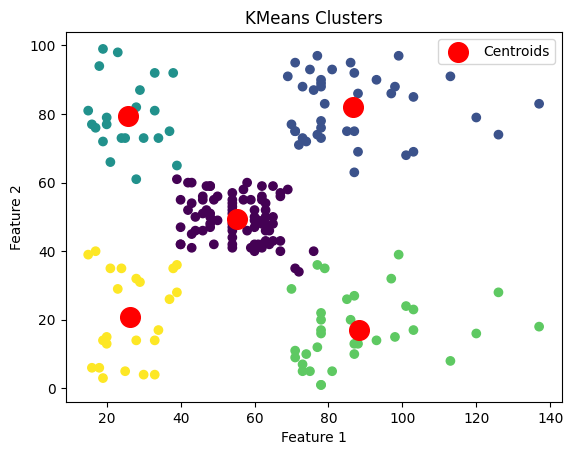

In [ ]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Example KMeans
kmeans = KMeans(n_clusters=5, random_state=42)
df['cluster_labels'] = kmeans.fit_predict(x)

# Plot clusters (assuming x has 2 features for visualization)
plt.scatter(x.iloc[:, 0], x.iloc[:, 1], c=df['cluster_labels'], cmap='viridis')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1],
            s=200, c='red', label='Centroids')

plt.title('KMeans Clusters')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.show()


In [ ]:
# Step 1: Install and import libraries (if needed)
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Step 2: Load your dataset
# Example: df = pd.read_csv('your_file.csv')

# Step 3: Select features for clustering
features = df[['feature1', 'feature2', 'feature3']]  # change to your columns

# Step 4: Scale the features
scaler = StandardScaler()
x_scaled = scaler.fit_transform(features)

# Step 5: Create and fit KMeans model
kmeans = KMeans(n_clusters=5, random_state=42)
df['segment'] = kmeans.fit_predict(x_scaled)

# Step 6: View segment counts
print(df['segment'].value_counts())

# Step 7: View cluster centers (original scale)
centers_scaled = kmeans.cluster_centers_
centers_original = pd.DataFrame(
    scaler.inverse_transform(centers_scaled),
    columns=features.columns
)
print("\nCluster Centers (Original Scale):")
print(centers_original)

# Step 8: Optional — plot clusters (only works well for 2D features)
plt.scatter(x_scaled[:, 0], x_scaled[:, 1], c=df['segment'], cmap='viridis')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1],
            s=200, c='red', marker='X', label='Centroids')
plt.title('KMeans Clusters')
plt.xlabel('Feature 1 (scaled)')
plt.ylabel('Feature 2 (scaled)')
plt.legend()
plt.show()



KeyError: "None of [Index(['feature1', 'feature2', 'feature3'], dtype='object')] are in the [columns]"